In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from scipy.special import softmax

In [37]:
fish = pd.read_csv("https://bit.ly/fish_csv_data")
print(fish.shape)
print("럭키백에 들어갈 물고기 7마리", *pd.unique(fish["Species"]))
fish.head()

(159, 6)
럭키백에 들어갈 물고기 7마리 Bream Roach Whitefish Parkki Perch Pike Smelt


,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


입력 데이터를 5개의 열로 구성

In [38]:
fish_input = fish[["Weight", "Length", "Diagonal", "Height", "Width"]].to_numpy()
fish_target = fish["Species"].to_numpy()

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)
print(train_input.shape)
print(test_input.shape)
print(train_target.shape)
print(test_target.shape)

(119, 5)
(40, 5)
(119,)
(40,)


전처리 (표준점수)

In [39]:
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_input[:5])
print(train_scaled[:5])

[[720.      35.      40.6     16.3618   6.09  ]
 [500.      45.      48.       6.96     4.896 ]
 [  7.5     10.5     11.6      1.972    1.16  ]
 [110.      22.      23.5      5.5225   3.995 ]
 [140.      20.7     23.2      8.5376   3.2944]]
[[ 0.91965782  0.60943175  0.81041221  1.85194896  1.00075672]
 [ 0.30041219  1.54653445  1.45316551 -0.46981663  0.27291745]
 [-1.0858536  -1.68646987 -1.70848587 -1.70159849 -2.0044758 ]
 [-0.79734143 -0.60880176 -0.67486907 -0.82480589 -0.27631471]
 [-0.71289885 -0.73062511 -0.70092664 -0.0802298  -0.7033869 ]]


## KNN 다중 분류

In [40]:
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))
print(kn.classes_)

# 예측
print(kn.predict(test_scaled[:5]))

0.8907563025210085
0.85
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


예측 확률 확인

In [41]:
proba = kn.predict_proba(test_scaled[:5])
print(*kn.classes_)
print(np.round(proba, decimals = 4))

Bream Parkki Perch Pike Roach Smelt Whitefish
[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


# 로지스틱
* 예측값을 확률로 표현

***시그모이드 함수   ***   
로지스틱 함수
* 무한히 작아져도 0에 수렴,
* 무한히 커져도 1에 수렴

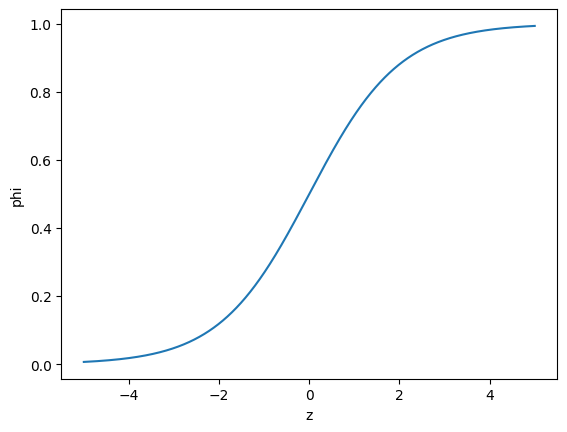

In [42]:
z = np.arange(-5, 5, 0.001)
phi = 1 / (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

이진 분류
* 도미와 빙어 행만 선택

In [43]:
bream_smelt_indexes = (train_target == "Bream") | (train_target == 'Smelt') # boolean 인덱싱

train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

print(train_bream_smelt.shape)
print(target_bream_smelt.shape)
print(target_bream_smelt)

(33, 5)
(33,)
['Bream' 'Smelt' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Bream' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream' 'Smelt' 'Smelt' 'Bream'
 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Bream' 'Smelt' 'Bream'
 'Smelt' 'Smelt' 'Bream' 'Smelt' 'Bream' 'Bream']


로지스틱 회귀 모델 훈련

In [44]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


0번 열은 클래스 0에 대한 확률   
1번 열은 클래스 1에 대한 확률

In [45]:
print(lr.classes_)
print(lr.predict_proba(train_bream_smelt[:5]))

['Bream' 'Smelt']
[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


계수 확인

In [46]:
print(lr.coef_, lr.intercept_)

"""
[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
판단 과정
z = (-0.403 * Weight) + (-0.572 * Length) + (-0.662 * Diagonal) + (-1.012 * Height) + (-0.731 * Width) - 2.161
z = LogisticRegression().decisions_function(train_bream_smelt)

phi = 1 / (1 + np.exp(-z))
phi = scipy.special.expit(z)
"""

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


'\n[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]\n판단 과정\nz = (-0.403 * Weight) + (-0.572 * Length) + (-0.662 * Diagonal) + (-1.012 * Height) + (-0.731 * Width) - 2.161\nz = LogisticRegression().decisions_function(train_bream_smelt)\n\nphi = 1 / (1 + np.exp(-z))\nphi = scipy.special.expit(z)\n'

# 로지스틱 회귀 다중 분류

In [47]:
lr2 = LogisticRegression(C = 20, max_iter = 1000)

lr2.fit(train_scaled, train_target)
print(lr2.score(train_scaled, train_target))
print(lr2.score(test_scaled, test_target))

0.9327731092436975
0.925


샘플 예측 확인

In [48]:
print(lr2.predict(test_scaled[:5]))
proba = lr2.predict_proba(test_scaled[:5]) # softmax 사용중임
print(np.round(proba, decimals = 3)) # 5개 샘플에 대한 7개 출력

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


다중 분류의 선형 방정식

In [49]:
print(lr2.coef_.shape, lr2.intercept_.shape)
print(lr2.coef_, lr2.intercept_)

(7, 5) (7,)
[[-1.49001259 -1.02909653  2.59342992  7.70358183 -1.20070797]
 [ 0.19618191 -2.01072007 -3.77974344  6.50492519 -1.99481478]
 [ 3.562807    6.34355461 -8.48969786 -5.75757213  3.79306162]
 [-0.10458363  3.60320663  3.93067948 -3.61740078 -1.7506979 ]
 [-1.40060998 -6.0750259   5.25969918 -0.87219289  1.86043812]
 [-1.38528461  1.49213609  1.39225441 -5.67734711 -4.40097409]
 [ 0.6215019  -2.32405484 -0.9066217   1.71600589  3.69369499]] [-0.09204689 -0.26289902  3.25100925 -0.14740759  2.65498221 -6.78787045
  1.38423249]


## 소프트맥스 함수
* 여러 개의 선형 방정식 출력 값을 0과 1사이로 압축하고 전체 합을 1로 조정하는 함수임

In [50]:
decision = lr2.decision_function(test_scaled[:5]) # z값 확인
print(np.round(decision, decimals = 2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [51]:
proba = softmax(decision, axis = 1)
print(lr2.classes_)
print(np.round(proba, decimals = 3))
for i in range(5):
  print(lr2.classes_[np.argmax(proba[i])], np.argmax(proba[i]))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
Perch 2
Smelt 5
Pike 3
Roach 4
Perch 2


In [53]:
print(np.round(lr2.predict_proba(test_scaled[:5]), decimals = 3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
